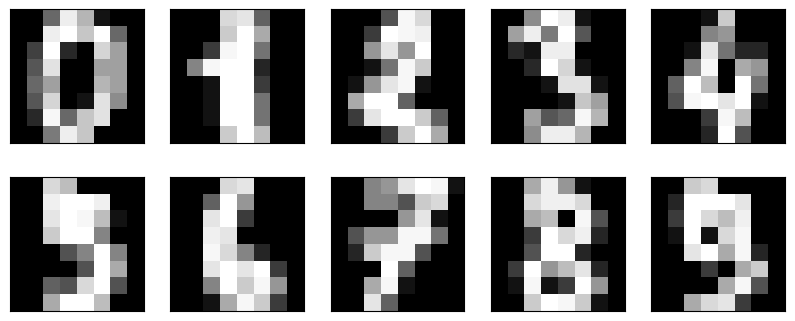

データの形状 (1797, 64)
ラベル [0 1 2 3 4 5 6 7 8 9]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()
n_img = 10
plt.figure(figsize=(10,4))
for i in range(n_img):
  ax = plt.subplot(2,5,i+1)
  plt.imshow(digits_data.data[i].reshape(8,8), cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
print('データの形状', digits_data.data.shape)
print('ラベル', digits_data.target[:n_img])

In [3]:
digits_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import dataloader, TensorDataset

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
digit_images = digits_data.data
labels = digits_data.target

In [23]:
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)

In [24]:
x_train = torch.FloatTensor(x_train)
t_train = torch.LongTensor(t_train)
x_test = torch.FloatTensor(x_test)
t_test = torch.LongTensor(t_test)

nnモジュールのSequentialクラスを用いる

In [61]:
net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16,10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=net.parameters(), lr=0.01)

In [63]:
record_loss_train = []
record_loss_test = []

In [64]:
for epoch in range(1000):
  optimizer.zero_grad()
  y_train = net(x_train)
  y_test = net(x_test)
  loss_train = criterion(y_train, t_train)
  loss_test = criterion(y_test, t_test)
  record_loss_train.append(loss_train.data)
  record_loss_test.append(loss_test.data)
  loss_train.backward()
  optimizer.step()
  if epoch%100 == 0:
    print(epoch, loss_train.data, loss_test.data)

0 tensor(2.3700) tensor(2.3590)
100 tensor(1.4887) tensor(1.5293)
200 tensor(0.6433) tensor(0.6736)
300 tensor(0.3308) tensor(0.3563)
400 tensor(0.2185) tensor(0.2453)
500 tensor(0.1663) tensor(0.1971)
600 tensor(0.1352) tensor(0.1700)
700 tensor(0.1137) tensor(0.1526)
800 tensor(0.0976) tensor(0.1412)
900 tensor(0.0850) tensor(0.1331)


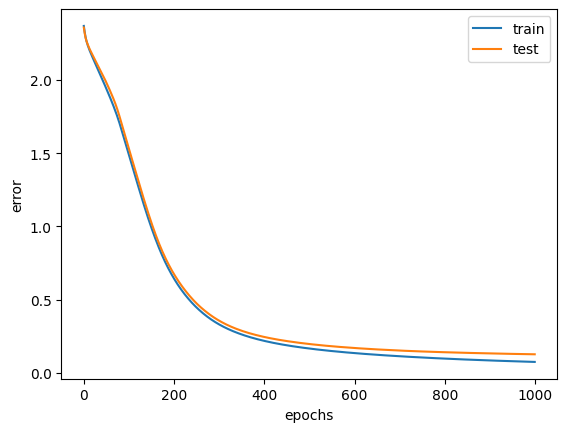

In [65]:
plt.plot(range(len(record_loss_train)), record_loss_train, label='train')
plt.plot(range(len(record_loss_test)), record_loss_test, label='test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

In [77]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print('正解率:'+str(count/len(y_test)*100))

正解率:97.11111111111111


classを定義

In [93]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc6 = nn.Linear(64,32)
    self.fc7 = nn.Linear(32,16)
    self.fc8 = nn.Linear(16,10)
  def forward(self,x):
    x = F.relu(self.fc6(x))
    x = F.relu(self.fc7(x))
    x = self.fc8(x)
    return x

In [94]:
model = Net()

In [95]:
train = TensorDataset(x_train, t_train)
train_loader = dataloader.DataLoader(train, batch_size=15, shuffle=True)

In [96]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [97]:
record_train_score = []
record_test_score = []
for epoch in range(100):
  total_loss = 0
  for x_train_b ,t_train_b in train_loader:
    optimizer.zero_grad()
    output = model(x_train_b)
    loss = criterion(output, t_train_b)
    loss.backward()
    optimizer.step()
    total_loss += loss.data
  y_train = model(x_train)
  train_loss = criterion(y_train, t_train)
  y_test = model(x_test)
  test_loss = criterion(y_test, t_test)
  record_train_score.append(train_loss.item())
  record_test_score.append(test_loss.item())
  if epoch%10 == 0:
    print(epoch, total_loss)

0 tensor(153.6154)
10 tensor(9.4155)
20 tensor(3.6085)
30 tensor(1.8189)
40 tensor(1.0011)
50 tensor(0.6538)
60 tensor(0.4798)
70 tensor(0.3653)
80 tensor(0.2877)
90 tensor(0.2377)


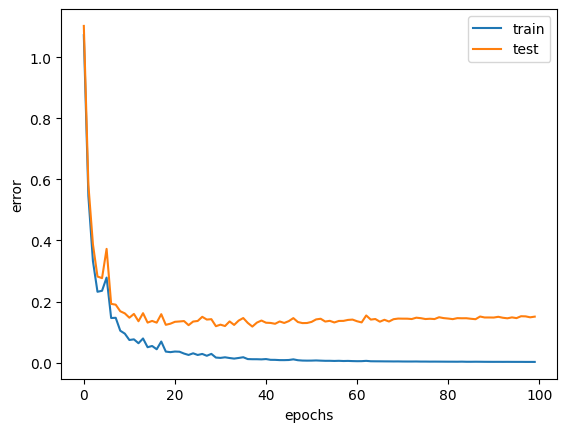

In [98]:
plt.plot(range(len(record_train_score)), record_train_score, label='train')
plt.plot(range(len(record_test_score)), record_test_score, label='test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

In [99]:
y_test = model(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print('正解率:'+str(count/len(y_test)*100))

正解率:96.0


> # MNISTのデータ

In [1]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

In [2]:
mnist_train = MNIST("./mydata",train=True, download=True, transform=transforms.ToTensor())
mnist_test = MNIST("./mydata",train=False, download=True, transform=transforms.ToTensor())

print('訓練データの数', len(mnist_train), 'テストデータの数', len(mnist_test))

100%|██████████| 9912422/9912422 [00:00<00:00, 129008940.47it/s]


Extracting ./mydata/MNIST/raw/train-images-idx3-ubyte.gz to ./mydata/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 102657367.65it/s]


Extracting ./mydata/MNIST/raw/train-labels-idx1-ubyte.gz to ./mydata/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36167386.07it/s]

Extracting ./mydata/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mydata/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21872019.25it/s]


Extracting ./mydata/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mydata/MNIST/raw

訓練データの数 60000 テストデータの数 10000


In [3]:
batch_size=256
train_loader = DataLoader(mnist_train, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=len(mnist_test),shuffle=False)

In [4]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [5]:
my_x, my_t = next(iter(train_loader))
my_x.shape
my_xx = my_x.view(-1,784) #カラム数が28*28のイメージ
my_xx.shape

torch.Size([256, 784])

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,1024)
    self.fc2 = nn.Linear(1024,512)
    self.fc3 = nn.Linear(512,10)
  def forward(self, x):
    x = x.view(-1,784)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [8]:
net = Net()
net.cuda()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [9]:
from torch import optim

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [11]:
record_loss_train = []
record_loss_test = []

In [13]:
for epoch in range(20):
  net.train() # 訓練モード
  loss_train = 0
  for i, (x, t) in enumerate(train_loader):
    optimizer.zero_grad()
    x, t = x.cuda(),  t.cuda()
    y = net(x)
    loss = criterion(y, t)
    loss_train += loss.item()
    loss.backward()
    optimizer.step()
  loss_train /= i+1
  record_loss_train.append(loss_train)

  net.eval() # 検証モード
  loss_test = 0
  for i , (x, t) in enumerate(test_loader):
    x, t = x.cuda(), t.cuda()
    with torch.no_grad():
      y = net(x)
    loss = criterion(y,t)
    loss_test += loss.item()
  loss_test /= i+1
  record_loss_test.append(loss_test)
  print("Epoch:",epoch,"Loss_Train:",loss_train,"Loss_Test:",loss_test)

Epoch: 0 Loss_Train: 2.2234546681667897 Loss_Test: 2.10443115234375
Epoch: 1 Loss_Train: 1.8520496500299333 Loss_Test: 1.4835344552993774
Epoch: 2 Loss_Train: 1.1490814728939787 Loss_Test: 0.8594117164611816
Epoch: 3 Loss_Train: 0.7455288275759271 Loss_Test: 0.6218405365943909
Epoch: 4 Loss_Train: 0.5815244171213596 Loss_Test: 0.5099416971206665
Epoch: 5 Loss_Train: 0.4958584614256595 Loss_Test: 0.4481944739818573
Epoch: 6 Loss_Train: 0.4438339722917435 Loss_Test: 0.4070972800254822
Epoch: 7 Loss_Train: 0.4094594583866444 Loss_Test: 0.3796764016151428
Epoch: 8 Loss_Train: 0.38505143041306356 Loss_Test: 0.3582354784011841
Epoch: 9 Loss_Train: 0.36587984409738095 Loss_Test: 0.3435872197151184
Epoch: 10 Loss_Train: 0.3507557324272521 Loss_Test: 0.33061763644218445
Epoch: 11 Loss_Train: 0.3388213108828727 Loss_Test: 0.32003259658813477
Epoch: 12 Loss_Train: 0.3283482385442612 Loss_Test: 0.31078729033470154
Epoch: 13 Loss_Train: 0.31888984207143173 Loss_Test: 0.30223512649536133
Epoch: 14 L

In [14]:
import matplotlib.pyplot as plt

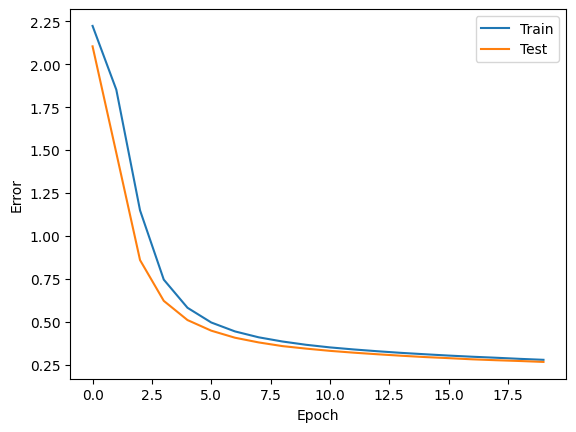

In [15]:
plt.plot(range(len(record_loss_train)),record_loss_train, label='Train')
plt.plot(range(len(record_loss_test)),record_loss_test, label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [16]:
correct = 0
total = 0
for i , (x, t) in enumerate(test_loader):
  x, t = x.cuda(), t.cuda()
  x = x.view(-1,784)
  with torch.no_grad():
    y = net(x)
  correct += (y.argmax(1)==t).sum().item()
  total += len(x)
print('正解率',str(correct/total*100))

正解率 92.42
